# **Proyecto Detección Accidentes de Tráfico**

Cargamos las librerias necesarias

In [4]:
! pip install --upgrade category_encoders

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import numpy as np
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Cargamos el dataset de accidentes de tráfico

In [7]:
df = pd.read_csv('/content/drive/MyDrive/TFM/datasets/2023_Accidentalidad_c_g_s_d_clean.csv' , sep= ";" )


Resumen datos

In [8]:
df.head()

,Unnamed: 0,num_expediente,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,estado_meteorológico,...,coordinates_speed_api,road_name_speed_api,speedlimit_kph_speed_api,dia_semana,hora_accidente,int_real,ocupacion,vmed,high_speed_point,hora_rango
0,0,2023S000001,2023-01-01,01:15:00,"AVDA. ALFONSO XIII, 33",33,5,Chamartín,Alcance,Despejado,...,"{'latitude': 40.45191182917747, 'longitude': -...",Avenida de Alfonso XIII,50,Sunday,1:15:00,135.100769,5.347692,73.0,0,1
1,1,2023S000001,2023-01-01,01:15:00,"AVDA. ALFONSO XIII, 33",33,5,Chamartín,Alcance,Despejado,...,"{'latitude': 40.45191182917747, 'longitude': -...",Avenida de Alfonso XIII,50,Sunday,1:15:00,135.100769,5.347692,73.0,0,1
2,2,2023S000001,2023-01-01,01:15:00,"AVDA. ALFONSO XIII, 33",33,5,Chamartín,Alcance,Despejado,...,"{'latitude': 40.45191182917747, 'longitude': -...",Avenida de Alfonso XIII,50,Sunday,1:15:00,135.100769,5.347692,73.0,0,1
3,3,2023S000001,2023-01-01,01:15:00,"AVDA. ALFONSO XIII, 33",33,5,Chamartín,Alcance,Despejado,...,"{'latitude': 40.45191182917747, 'longitude': -...",Avenida de Alfonso XIII,50,Sunday,1:15:00,135.100769,5.347692,73.0,0,1
4,4,2023S000001,2023-01-01,01:15:00,"AVDA. ALFONSO XIII, 33",33,5,Chamartín,Alcance,Despejado,...,"{'latitude': 40.45191182917747, 'longitude': -...",Avenida de Alfonso XIII,50,Sunday,1:15:00,135.100769,5.347692,73.0,0,1


Columnas del dataset

In [9]:
df.columns

Index(['Unnamed: 0', 'num_expediente', 'fecha', 'hora', 'localizacion',
       'numero', 'cod_distrito', 'distrito', 'tipo_accidente',
       'estado_meteorológico', 'tipo_vehiculo', 'tipo_persona', 'rango_edad',
       'sexo', 'cod_lesividad', 'lesividad', 'coordenada_x_utm',
       'coordenada_y_utm', 'positiva_alcohol', 'positiva_droga', 'longitude',
       'latitude', 'geohash', 'road_info', 'category', 'type', 'house_number',
       'postcode', 'quarter', 'road', 'formatted', 'latitude_api',
       'longitude_api', 'coordinates_speed_api', 'road_name_speed_api',
       'speedlimit_kph_speed_api', 'dia_semana', 'hora_accidente', 'int_real',
       'ocupacion', 'vmed', 'high_speed_point', 'hora_rango'],
      dtype='object')

**Analisis Dataset**

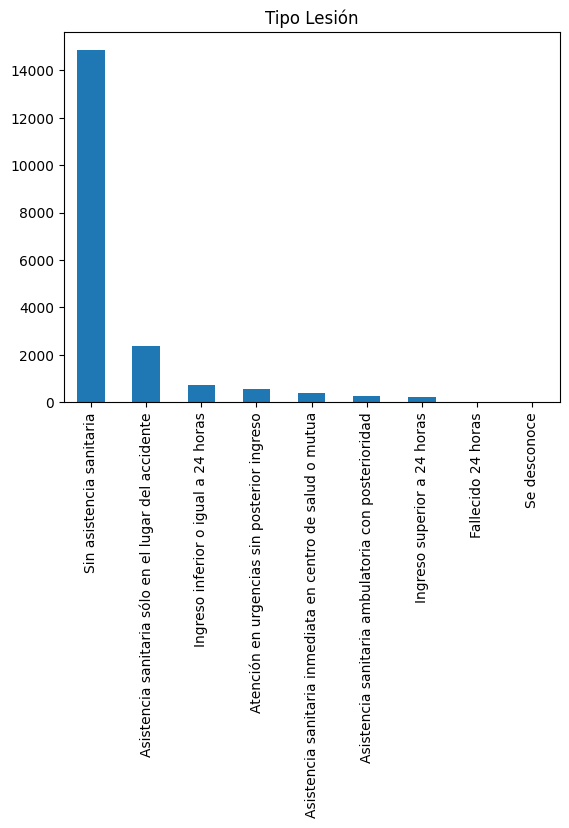

In [10]:
plot = df['lesividad'].value_counts().plot(kind='bar',title='Tipo Lesión')

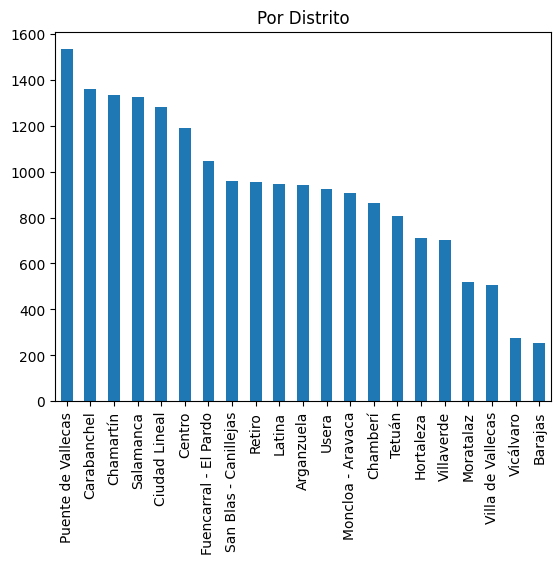

In [11]:
plot = df['distrito'].value_counts().plot(kind='bar',title='Por Distrito')

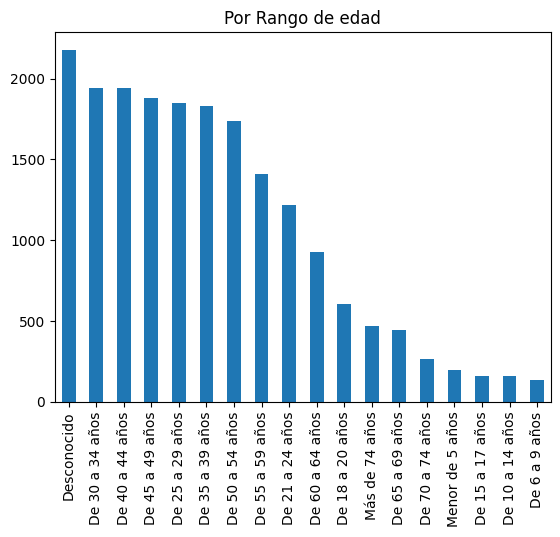

In [12]:
plot = df['rango_edad'].value_counts().plot(kind='bar',title='Por Rango de edad')

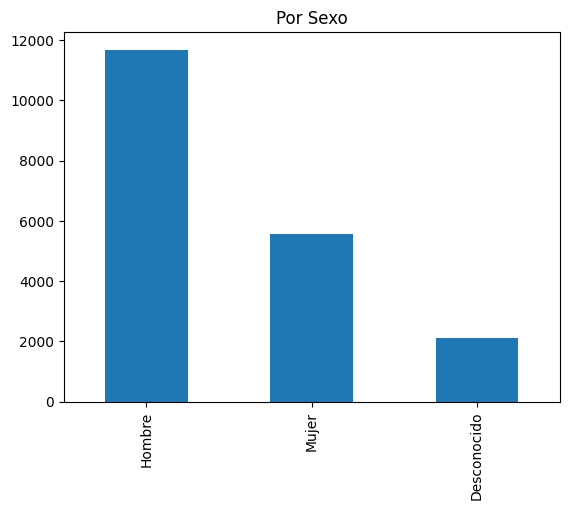

In [13]:
plot = df['sexo'].value_counts().plot(kind='bar',title='Por Sexo')

In [14]:
# Comprobamos las dimensiones del dataset
df.shape

(19349, 43)

In [15]:
#vemos los tipos de datos de las columnas
df.dtypes

Unnamed: 0                    int64
num_expediente               object
fecha                        object
hora                         object
localizacion                 object
numero                       object
cod_distrito                  int64
distrito                     object
tipo_accidente               object
estado_meteorológico         object
tipo_vehiculo                object
tipo_persona                 object
rango_edad                   object
sexo                         object
cod_lesividad               float64
lesividad                    object
coordenada_x_utm            float64
coordenada_y_utm            float64
positiva_alcohol             object
positiva_droga                int64
longitude                   float64
latitude                    float64
geohash                      object
road_info                    object
category                     object
type                         object
house_number                 object
postcode                    

In [16]:
# Vemos la estadística de la variables numérica
df.describe()

,Unnamed: 0,cod_distrito,cod_lesividad,coordenada_x_utm,coordenada_y_utm,positiva_droga,longitude,latitude,postcode,latitude_api,longitude_api,speedlimit_kph_speed_api,int_real,ocupacion,vmed,high_speed_point,hora_rango
count,19349.000000,19349.000000,19349.000000,19349.000000,1.934900e+04,19349.000000,19349.000000,19349.000000,19328.000000,19349.000000,19349.000000,19349.000000,19349.000000,19349.000000,19349.000000,19349.000000,19349.000000
mean,10283.088377,9.795958,11.933485,442054.287106,4.474638e+06,0.004083,-3.683042,40.420351,28031.542632,40.420357,-3.683043,43.699416,125.094971,7.484347,50.149381,0.093700,13.921340
std,5923.543703,5.617597,3.966180,3447.673650,3.978426e+03,0.063769,0.040578,0.035880,246.999845,0.035886,0.040577,16.211652,59.181876,3.491185,28.368740,0.291418,5.730601
min,0.000000,1.000000,1.000000,429081.342000,4.463661e+06,0.000000,-3.836651,40.321411,20824.000000,40.320694,-3.836675,10.000000,3.902597,0.114286,0.000000,0.000000,0.000000
25%,5176.000000,5.000000,14.000000,439929.401000,4.471575e+06,0.000000,-3.708093,40.392750,28013.000000,40.392790,-3.708100,30.000000,82.919786,4.972222,46.230000,0.000000,10.000000
50%,10293.000000,10.000000,14.000000,441684.701000,4.474691e+06,0.000000,-3.687449,40.420758,28026.000000,40.420854,-3.687480,50.000000,122.328877,7.756944,61.440000,0.000000,15.000000
75%,15401.000000,14.000000,14.000000,443979.477000,4.477299e+06,0.000000,-3.660492,40.444637,28039.000000,40.444741,-3.660510,50.000000,166.453728,9.812317,70.560000,0.000000,18.000000
max,20525.000000,21.000000,77.000000,454434.352000,4.489373e+06,1.000000,-3.537327,40.553107,29039.000000,40.554050,-3.537853,120.000000,478.743056,21.620690,96.500000,1.000000,23.000000


In [17]:
# Vemos la estadística de las variables categóricas
df.describe(include = object)

,num_expediente,fecha,hora,localizacion,numero,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,tipo_persona,...,category,type,house_number,quarter,road,formatted,coordinates_speed_api,road_name_speed_api,dia_semana,hora_accidente
count,19349,19349,19349,19349,19349,19349,19349,19349,19349,19349,...,19349,19349,6193,18092,19349,19349,19349,18327,19349,19349
unique,8159,151,96,7271,1005,21,13,6,33,3,...,14,55,358,120,2340,5572,8149,2281,7,939
top,2023S019009,2023-03-02,18:00:00,"AUTOV. A-2, +00500E",1,Puente de Vallecas,Colisión fronto-lateral,Despejado,Turismo,Conductor,...,government,administrative,2,Entrevías,Avenida de la Paz,"Paseo de la Castellana, 28046 Madrid, Spain","{'latitude': 40.38616573144755, 'longitude': -...",M-30,Friday,18:00:00
freq,23,207,372,39,1673,1534,4726,17432,13550,15630,...,14484,14475,217,415,525,182,23,681,3123,198


In [18]:
# Verificamos datos faltantes por columnas
df.isnull().sum()

Unnamed: 0                      0
num_expediente                  0
fecha                           0
hora                            0
localizacion                    0
numero                          0
cod_distrito                    0
distrito                        0
tipo_accidente                  0
estado_meteorológico            0
tipo_vehiculo                   0
tipo_persona                    0
rango_edad                      0
sexo                            0
cod_lesividad                   0
lesividad                       0
coordenada_x_utm                0
coordenada_y_utm                0
positiva_alcohol                0
positiva_droga                  0
longitude                       0
latitude                        0
geohash                         0
road_info                       0
category                        0
type                            0
house_number                13156
postcode                       21
quarter                      1257
road          

In [19]:
# Sumamos los datos faltantes
df.isna().sum().sum()

15456

In [20]:
#Vemos el porcentaje de datos faltantes
def percentage_missing_data(df):
    missing_data_volume = df.isna().sum().sum() / np.product(df.shape) * 100
    return f'El volumen de los datos faltan es de: {round(missing_data_volume, 2)}%'

In [21]:
percentage_missing_data(df)

'El volumen de los datos faltan es de: 1.86%'

In [22]:
#podemos ver la cantidad de datos nulos por columnas en un gráfico

def Accidentes_nan(df, n):
    Accidentes_nan = (

    df
    .isna() # Devulve true o false por cada valor nulo.
    .sum() # Sumamos cada valor nulo de cada fila de cada columns.
    .to_frame() # Pasamos de tener un conjunto de datos de tipo serie a un dataframe.
    .reset_index() # Hacemos un reset index.
    .rename(columns = {'index':'columns', 0:'freq'}) # Renombramos la columna.

    )

    Accidentes_nan['%'] = round(Accidentes_nan['freq'] / len(df)*100, n) # Creamos la columna % para ver el procentaje de valores nulos por columns
    return Accidentes_nan

In [23]:
Accidentes_nan = Accidentes_nan(df, 3)

<Axes: ylabel='columns'>

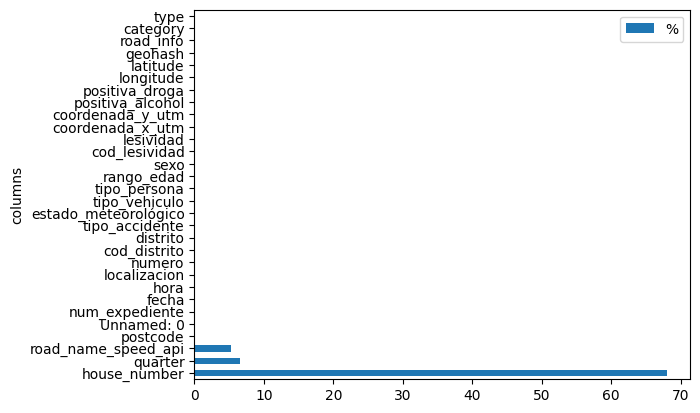

In [24]:
Accidentes_nan.nlargest(30, '%').set_index('columns')[[ '%']].plot.barh()

In [25]:
#eliminamos la columna positiva_droga ya que vemos que casi todos sus datos son faltantes
df_nuevo = df.drop(['positiva_droga'], axis=1)

In [26]:
df_nuevo.head()

,Unnamed: 0,num_expediente,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,estado_meteorológico,...,coordinates_speed_api,road_name_speed_api,speedlimit_kph_speed_api,dia_semana,hora_accidente,int_real,ocupacion,vmed,high_speed_point,hora_rango
0,0,2023S000001,2023-01-01,01:15:00,"AVDA. ALFONSO XIII, 33",33,5,Chamartín,Alcance,Despejado,...,"{'latitude': 40.45191182917747, 'longitude': -...",Avenida de Alfonso XIII,50,Sunday,1:15:00,135.100769,5.347692,73.0,0,1
1,1,2023S000001,2023-01-01,01:15:00,"AVDA. ALFONSO XIII, 33",33,5,Chamartín,Alcance,Despejado,...,"{'latitude': 40.45191182917747, 'longitude': -...",Avenida de Alfonso XIII,50,Sunday,1:15:00,135.100769,5.347692,73.0,0,1
2,2,2023S000001,2023-01-01,01:15:00,"AVDA. ALFONSO XIII, 33",33,5,Chamartín,Alcance,Despejado,...,"{'latitude': 40.45191182917747, 'longitude': -...",Avenida de Alfonso XIII,50,Sunday,1:15:00,135.100769,5.347692,73.0,0,1
3,3,2023S000001,2023-01-01,01:15:00,"AVDA. ALFONSO XIII, 33",33,5,Chamartín,Alcance,Despejado,...,"{'latitude': 40.45191182917747, 'longitude': -...",Avenida de Alfonso XIII,50,Sunday,1:15:00,135.100769,5.347692,73.0,0,1
4,4,2023S000001,2023-01-01,01:15:00,"AVDA. ALFONSO XIII, 33",33,5,Chamartín,Alcance,Despejado,...,"{'latitude': 40.45191182917747, 'longitude': -...",Avenida de Alfonso XIII,50,Sunday,1:15:00,135.100769,5.347692,73.0,0,1


In [27]:
#luego reemplazaremos los valores faltantes de las columnas categoricas por su moda
# Lista de columnas categóricas
categorical_columns = ['tipo_vehiculo', 'numero', 'estado_meteorológico', 'cod_lesividad', 'lesividad',
                       'coordenada_x_utm', 'coordenada_y_utm', 'positiva_alcohol',
                      'rango_edad', 'sexo']

In [28]:
def fill_missing_with_mode(df_nuevo, categorical_columns):
    for column in categorical_columns:
        moda = df_nuevo[column].mode()[0]
        df_nuevo[column].fillna(moda, inplace=True)

In [29]:
fill_missing_with_mode(df_nuevo, categorical_columns)

In [30]:
#ahora vemos que nuestro data set quedó sin valores faltantes
df_nuevo.isna().sum()

Unnamed: 0                      0
num_expediente                  0
fecha                           0
hora                            0
localizacion                    0
numero                          0
cod_distrito                    0
distrito                        0
tipo_accidente                  0
estado_meteorológico            0
tipo_vehiculo                   0
tipo_persona                    0
rango_edad                      0
sexo                            0
cod_lesividad                   0
lesividad                       0
coordenada_x_utm                0
coordenada_y_utm                0
positiva_alcohol                0
longitude                       0
latitude                        0
geohash                         0
road_info                       0
category                        0
type                            0
house_number                13156
postcode                       21
quarter                      1257
road                            0
formatted     

#Modelo 1º **Ramdom Forest Clasiffier**

Quitamos campos que dan error en el modelo

In [31]:

df_nuevo.head(5)

,Unnamed: 0,num_expediente,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,estado_meteorológico,...,coordinates_speed_api,road_name_speed_api,speedlimit_kph_speed_api,dia_semana,hora_accidente,int_real,ocupacion,vmed,high_speed_point,hora_rango
0,0,2023S000001,2023-01-01,01:15:00,"AVDA. ALFONSO XIII, 33",33,5,Chamartín,Alcance,Despejado,...,"{'latitude': 40.45191182917747, 'longitude': -...",Avenida de Alfonso XIII,50,Sunday,1:15:00,135.100769,5.347692,73.0,0,1
1,1,2023S000001,2023-01-01,01:15:00,"AVDA. ALFONSO XIII, 33",33,5,Chamartín,Alcance,Despejado,...,"{'latitude': 40.45191182917747, 'longitude': -...",Avenida de Alfonso XIII,50,Sunday,1:15:00,135.100769,5.347692,73.0,0,1
2,2,2023S000001,2023-01-01,01:15:00,"AVDA. ALFONSO XIII, 33",33,5,Chamartín,Alcance,Despejado,...,"{'latitude': 40.45191182917747, 'longitude': -...",Avenida de Alfonso XIII,50,Sunday,1:15:00,135.100769,5.347692,73.0,0,1
3,3,2023S000001,2023-01-01,01:15:00,"AVDA. ALFONSO XIII, 33",33,5,Chamartín,Alcance,Despejado,...,"{'latitude': 40.45191182917747, 'longitude': -...",Avenida de Alfonso XIII,50,Sunday,1:15:00,135.100769,5.347692,73.0,0,1
4,4,2023S000001,2023-01-01,01:15:00,"AVDA. ALFONSO XIII, 33",33,5,Chamartín,Alcance,Despejado,...,"{'latitude': 40.45191182917747, 'longitude': -...",Avenida de Alfonso XIII,50,Sunday,1:15:00,135.100769,5.347692,73.0,0,1


In [32]:
df_bk =  df_nuevo

In [61]:
df_nuevo=df_bk.drop(['num_expediente',	'fecha',	'hora','distrito','numero','localizacion','coordenada_x_utm',	'coordenada_y_utm','lesividad','formatted', 'coordinates_speed_api', 'road_name_speed_api','geohash','house_number', 'postcode', 'quarter','type','category','latitude','latitude_api','longitude','longitude_api'], axis=1)

Dividimos el modelo quitando el campo de lesividad para predecirlo

In [62]:
X = df_nuevo.drop(['cod_lesividad'], axis=1)

y = df_nuevo['cod_lesividad']

Dividimos en training y test para testear el modelo

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

Vemos los campos del Training para ver los campos a normalizar

In [64]:
X_train.head()

,Unnamed: 0,cod_distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,tipo_persona,rango_edad,sexo,positiva_alcohol,road_info,road,speedlimit_kph_speed_api,dia_semana,hora_accidente,int_real,ocupacion,vmed,high_speed_point,hora_rango
11733,12468,6,Alcance,Despejado,Turismo,Conductor,De 40 a 44 años,Mujer,N,Calle Pedro Tezano,Calle Pedro Tezano,30,Sunday,21:50:00,63.069264,2.233766,0.00,0,21
18365,19487,2,Caída,Despejado,Motocicleta > 125cc,Conductor,De 25 a 29 años,Hombre,N,Calle de Moratines,Calle de Moratines,30,Thursday,8:20:00,228.428427,13.000000,59.73,0,8
5987,6394,13,Alcance,Despejado,Turismo,Conductor,De 45 a 49 años,Hombre,N,Avenida de la Paz,Avenida de la Paz,90,Friday,14:40:00,169.132895,12.389474,60.59,1,14
6036,6446,2,Alcance,Despejado,Turismo,Conductor,De 50 a 54 años,Mujer,N,Avenida de la Paz,Avenida de la Paz,90,Friday,20:15:00,188.196356,8.360324,58.12,1,20
1149,1215,4,Colisión fronto-lateral,Despejado,Furgoneta,Conductor,De 45 a 49 años,Hombre,N,Calle de Jorge Juan,Calle de Jorge Juan,30,Wednesday,10:05:00,224.866029,10.794258,76.38,0,10


Normalizamos los campos categoricos

In [65]:
encoder = ce.OrdinalEncoder(cols=['tipo_accidente', 'estado_meteorológico', 'tipo_vehiculo', 'tipo_persona', 'rango_edad', 'sexo', 'positiva_alcohol',  'road_info', 'road', 'dia_semana' , 'hora_accidente'])

In [66]:
X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [67]:
X_test.head()

,Unnamed: 0,cod_distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,tipo_persona,rango_edad,sexo,positiva_alcohol,road_info,road,speedlimit_kph_speed_api,dia_semana,hora_accidente,int_real,ocupacion,vmed,high_speed_point,hora_rango
257,283,16,5,1,1.0,1,15,2,1,1231.0,1231.0,30,7,218.0,99.703664,7.568966,69.30,0,19
1288,1356,2,7,1,3.0,2,7,2,1,3.0,3.0,90,2,494.0,181.175101,7.388664,61.16,1,14
1994,2114,12,4,1,1.0,1,14,2,2,-1.0,-1.0,30,4,279.0,167.991497,11.183673,58.81,0,18
16057,17034,2,3,1,1.0,1,2,2,1,10.0,10.0,50,1,487.0,60.541837,2.491736,65.98,0,2
7030,7516,2,5,1,4.0,1,5,1,1,1909.0,1909.0,30,1,179.0,120.688008,5.200820,62.20,0,11


In [68]:
# Identificar las características no numéricas
caracteristicas_no_numericas = df_nuevo.select_dtypes(exclude=['number'])

# Obtener los nombres de las columnas no numéricas
nombres_columnas_no_numericas = caracteristicas_no_numericas.columns.tolist()

# Mostrar los nombres de las columnas no numéricas
print(nombres_columnas_no_numericas)

['tipo_accidente', 'estado_meteorológico', 'tipo_vehiculo', 'tipo_persona', 'rango_edad', 'sexo', 'positiva_alcohol', 'road_info', 'road', 'dia_semana', 'hora_accidente']


In [69]:
columnas_con_nan = df_nuevo.columns[df_nuevo.isna().any()].tolist()

# Mostrar las columnas con valores NaN
print("Columnas con NaN:", columnas_con_nan)

Columnas con NaN: []


Iniciamos el Random Forest Classifier

In [70]:
# llamamos al Random Forest

rfc = RandomForestClassifier(n_estimators=100,random_state=0)

# Ajustamos el modelo

rfc.fit(X_train, y_train)

# Predecir los resultados del conjunto de pruebas

y_pred = rfc.predict(X_test)

# Revisamos el  accuracy score

from sklearn.metrics import accuracy_score

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 100 decision-trees : 0.7758


Encuentrar características importantes con el modelo Random Forest

In [71]:
# Creamos el Random Forrest con 100 arboles

clf = RandomForestClassifier(n_estimators=100, random_state=0)

# Ajustamos el modelo en training y test

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

Vemos las Variables más Importantes

In [72]:
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

tipo_vehiculo               0.104135
Unnamed: 0                  0.096739
ocupacion                   0.076205
int_real                    0.076002
hora_accidente              0.075784
rango_edad                  0.066889
road                        0.065040
road_info                   0.064038
vmed                        0.061398
hora_rango                  0.054339
tipo_persona                0.049673
cod_distrito                0.048893
tipo_accidente              0.047524
dia_semana                  0.038708
sexo                        0.030506
speedlimit_kph_speed_api    0.024407
estado_meteorológico        0.011744
high_speed_point            0.004440
positiva_alcohol            0.003534
dtype: float64

Gráfica de Valores más importantes

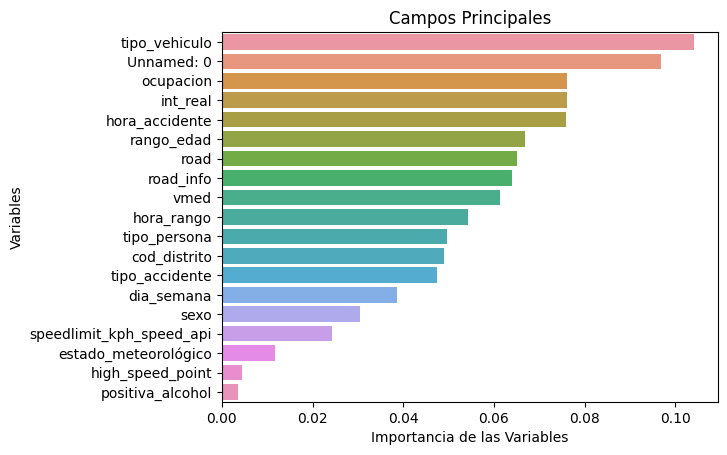

In [73]:
sns.barplot(x=feature_scores, y=feature_scores.index)

plt.xlabel('Importancia de las Variables')

plt.ylabel('Variables')

plt.title("Campos Principales")

plt.show()

In [75]:

import joblib

In [77]:
joblib.dump(clf, 'random_forest_model.pkl')

['random_forest_model.pkl']

# New section